
# SciPy and Statistics Examples

As a familiarisation exercise, this is walkthrough of the material from https://scipy-lectures.org/packages/statistics/index.html

There is some added value in that I have explored different ways of visualising the data being analysed.

## Initial Notebook Setup

```watermark``` self-documents the environment.

In [1]:
%load_ext watermark

```black``` is my preferred Python formatter

In [2]:
%load_ext lab_black

In [3]:
%matplotlib inline

All includes will go here

In [4]:
import pandas as pd
import numpy as np
import seaborn as sn

import matplotlib.pyplot as plt
from scipy import stats
from statsmodels.formula.api import ols
from statsmodels.formula.api import rlm
import statsmodels.api as sm

from statsmodels.sandbox.regression.predstd import (
    wls_prediction_std,
)

D:\Anaconda3\envs\ac5-py37\lib\site-packages\statsmodels\compat\pandas.py:49: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  data_klasses = (pandas.Series, pandas.DataFrame, pandas.Panel)


---
## Data Load

The initial dataset contains three different IQ measures, and data on subject weight, height, and brain size (as per MRI)

In [5]:
DATA_PREFIX = '../data/'
data = pd.read_csv(
    DATA_PREFIX + 'brain_size.csv', na_values=".", sep=';'
)

## Data Exploration

Display the first few rows

In [6]:
data.head()

,Unnamed: 0,Gender,FSIQ,VIQ,PIQ,Weight,Height,MRI_Count
0,1,Female,133,132,124,118.0,64.5,816932
1,2,Male,140,150,124,NaN,72.5,1001121
2,3,Male,139,123,150,143.0,73.3,1038437
3,4,Male,133,129,128,172.0,68.8,965353
4,5,Female,137,132,134,147.0,65.0,951545


Display the data types in our dataset

In [7]:
data.dtypes

Unnamed: 0      int64
Gender         object
FSIQ            int64
VIQ             int64
PIQ             int64
Weight        float64
Height        float64
MRI_Count       int64
dtype: object

Use ```describe``` to give a snapshot of each column that is numeric

In [8]:
data.describe()

,Unnamed: 0,FSIQ,VIQ,PIQ,Weight,Height,MRI_Count
count,40.000000,40.000000,40.000000,40.00000,38.000000,39.000000,4.000000e+01
mean,20.500000,113.450000,112.350000,111.02500,151.052632,68.525641,9.087550e+05
std,11.690452,24.082071,23.616107,22.47105,23.478509,3.994649,7.228205e+04
min,1.000000,77.000000,71.000000,72.00000,106.000000,62.000000,7.906190e+05
25%,10.750000,89.750000,90.000000,88.25000,135.250000,66.000000,8.559185e+05
50%,20.500000,116.500000,113.000000,115.00000,146.500000,68.000000,9.053990e+05
75%,30.250000,135.500000,129.750000,128.00000,172.000000,70.500000,9.500780e+05
max,40.000000,144.000000,150.000000,150.00000,192.000000,77.000000,1.079549e+06


Let us explore the difference gender makes.  We use the ```pandas``` ```groupby``` function, and then show the snapshot of each group

In [9]:
gender = data.groupby('Gender')

We see that we have a new type of object

In [10]:
gender

In [11]:
gender.describe()

Unnamed: 0                                                   FSIQ  \
            count   mean        std  min    25%   50%    75%   max count   
Gender                                                                     
Female       20.0  19.65  11.356774  1.0  10.25  18.0  29.25  38.0  20.0   
Male         20.0  21.35  12.248630  2.0  11.50  21.5  32.25  40.0  20.0   

               ...  Height       MRI_Count                                   \
         mean  ...     75%   max     count      mean          std       min   
Gender         ...                                                            
Female  111.9  ...  66.875  70.5      20.0  862654.6  55893.55578  790619.0   
Male    115.0  ...  73.750  77.0      20.0  954855.4  55911.35471  879987.0   

                                                  
              25%       50%       75%        max  
Gender                                            
Female  828062.00  855365.0  882668.5   991305.0  
Male    919529.25  947241.5  973496.0  1079549.0  

[2 rows x 56 columns]

In [12]:
gender.mean()

,Unnamed: 0,FSIQ,VIQ,PIQ,Weight,Height,MRI_Count
Gender,,,,,,,
Female,19.65,111.9,109.45,110.45,137.200000,65.765000,862654.6
Male,21.35,115.0,115.25,111.60,166.444444,71.431579,954855.4


In [13]:
gender.size()

Gender
Female    20
Male      20
dtype: int64

Display the first four rows of each Gender

In [14]:
gender.head(4)

,Unnamed: 0,Gender,FSIQ,VIQ,PIQ,Weight,Height,MRI_Count
0,1,Female,133,132,124,118.0,64.5,816932
1,2,Male,140,150,124,NaN,72.5,1001121
2,3,Male,139,123,150,143.0,73.3,1038437
3,4,Male,133,129,128,172.0,68.8,965353
4,5,Female,137,132,134,147.0,65.0,951545
5,6,Female,99,90,110,146.0,69.0,928799
6,7,Female,138,136,131,138.0,64.5,991305
8,9,Male,89,93,84,134.0,66.3,904858


----
## Data Visualization

We use the ```pandas``` plotting functions to quickly show the weights of each subject, color-coded by gender.

Gender
Female    AxesSubplot(0.125,0.125;0.775x0.755)
Male      AxesSubplot(0.125,0.125;0.775x0.755)
Name: Weight, dtype: object

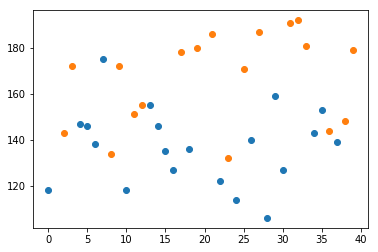

In [15]:
gender['Weight'].plot(style=['o', '+'])

Show the histogram of weights, grouped by gender

Gender
Female    AxesSubplot(0.125,0.125;0.775x0.755)
Male      AxesSubplot(0.125,0.125;0.775x0.755)
Name: Weight, dtype: object

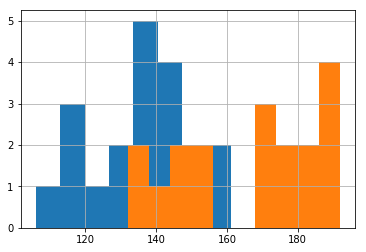

In [16]:
gender['Weight'].hist()

Show a boxplot with IQ scores, grouped by gender

Female         AxesSubplot(0.1,0.15;0.363636x0.75)
Male      AxesSubplot(0.536364,0.15;0.363636x0.75)
dtype: object

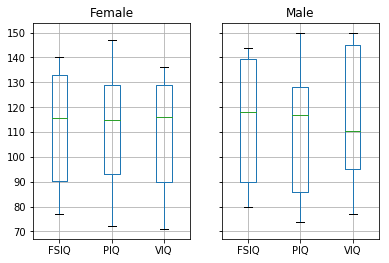

In [17]:
gender.boxplot(column=['FSIQ', 'PIQ', 'VIQ'])

Show a scatter plot of the non-IQ numeric data (one plot for each pair of variables).  As we might expect, aspects of body size appear to be positively correlated.

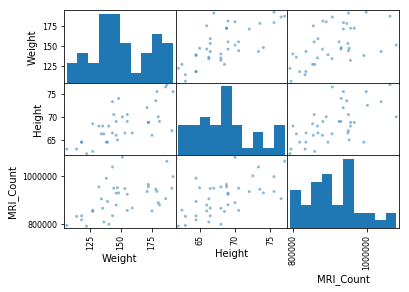

In [18]:
__ = pd.plotting.scatter_matrix(
    data[['Weight', 'Height', 'MRI_Count']]
)

Show a scatter plot for IQ measures (pairwise).  Different measures of IQ also appear to be positively correlated

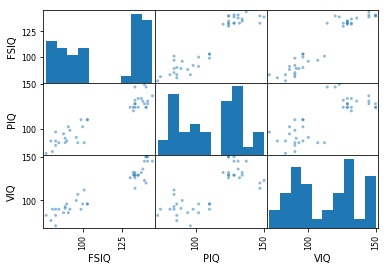

In [19]:
__ = pd.plotting.scatter_matrix(
    data[['FSIQ', 'PIQ', 'VIQ']]
)

We first clean the data by dropping all rows with a NA value, then create a new numeric column (1 for Male, 2 for Female), and then re-do the scatter plot as before, but coloring each point with a gender-specific color.  We set ```alpha``` to be almost one to get brighter colors.

In [20]:
clean_data = data.dropna()

In [21]:
sex_code = {'Male': 1, 'Female': 2}
sex_color = [sex_code[x] for x in clean_data['Gender']]

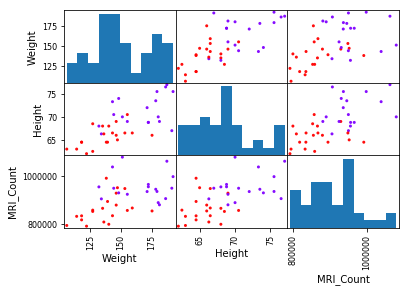

In [22]:
__ = pd.plotting.scatter_matrix(
    clean_data[['Weight', 'Height', 'MRI_Count']],
    c=sex_color,
    cmap='rainbow',
    alpha=0.95,
)

The same plot, but with default ```alpha```

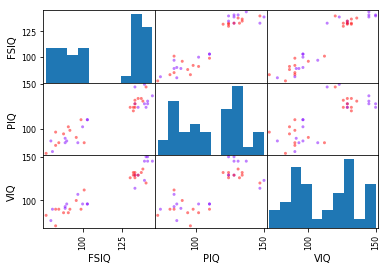

In [23]:
__ = pd.plotting.scatter_matrix(
    clean_data[['FSIQ', 'PIQ', 'VIQ']],
    c=sex_color,
    cmap='rainbow',
)

Almost too small at default size, but showing the relationships between all numeric variables.  FSIQ seems have have a gap in its values; if this was a real data analysis job, we would to investigate that.

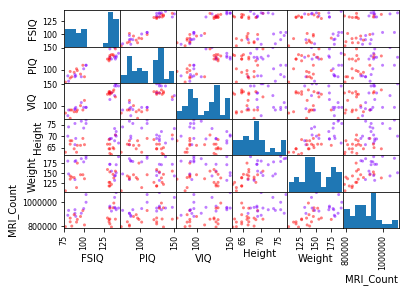

In [24]:
__ = pd.plotting.scatter_matrix(
    clean_data[
        [
            'FSIQ',
            'PIQ',
            'VIQ',
            'Height',
            'Weight',
            'MRI_Count',
        ]
    ],
    c=sex_color,
    cmap='rainbow',
)

----
## Statistical Tests

### Test of means > 0

As a finger exercise, test if any of the variables have a mean of zero (we expect none).  As expected, the probability of seeing the data we see, with a true mean of zero, is vanishingly small: we reject the mean=0 hypothesis.

We try ```VIQ``` first

In [25]:
stats.ttest_1samp(data['VIQ'], 0)

Ttest_1sampResult(statistic=30.088099970849328, pvalue=1.3289196468728067e-28)

Check all the variables

In [26]:
for name in [
    'Weight',
    'Height',
    'VIQ',
    'PIQ',
    'FSIQ',
    'MRI_Count',
]:
    print(
        f'T Test values for {name:20}: {stats.ttest_1samp(clean_data[name], 0)}'
    )
# end for

T Test values for Weight              : Ttest_1sampResult(statistic=39.65971373853829, pvalue=6.39263888216351e-32)
T Test values for Height              : Ttest_1sampResult(statistic=105.60788971919253, pvalue=1.6747259486645957e-47)
T Test values for VIQ                 : Ttest_1sampResult(statistic=30.132405743476752, pvalue=1.2294004595027533e-27)
T Test values for PIQ                 : Ttest_1sampResult(statistic=30.372726699843938, pvalue=9.265683776894988e-28)
T Test values for FSIQ                : Ttest_1sampResult(statistic=29.3921457404181, pvalue=2.976917593395147e-27)
T Test values for MRI_Count           : Ttest_1sampResult(statistic=77.03243851203136, pvalue=1.8665995958235843e-42)


## Test for gender difference

We now test for gender-related differences in the numeric values.  As expected, body-related variables (height, weight, MRI-count) show differences too  large to be explained by chance.  The IQ measures, not so.  Assuming unequal variance in the populations is a more stringent test (in the sense that the T values are smaller, and hence more likley to occur by chance, and hence we are less likely to reject the Null Hypothesis that means are equal.

In [27]:
for name in [
    'Weight',
    'Height',
    'VIQ',
    'PIQ',
    'FSIQ',
    'MRI_Count',
]:
    f_values = clean_data[clean_data['Gender'] == 'Female'][
        name
    ]
    m_values = clean_data[clean_data['Gender'] == 'Male'][
        name
    ]
    print(
        f'2 Sample T Test (Welch’s t-test) values for {name:10}: {stats.ttest_ind(f_values, m_values, equal_var=False)}'
    )
# end for

2 Sample T Test (Welch’s t-test) values for Weight    : Ttest_indResult(statistic=-4.827378552057042, pvalue=2.964900309600948e-05)
2 Sample T Test (Welch’s t-test) values for Height    : Ttest_indResult(statistic=-5.937236386105681, pvalue=1.7712232206445267e-06)
2 Sample T Test (Welch’s t-test) values for VIQ       : Ttest_indResult(statistic=-0.7501099096274505, pvalue=0.45832254829707375)
2 Sample T Test (Welch’s t-test) values for PIQ       : Ttest_indResult(statistic=-0.25209118945110864, pvalue=0.8024574345106845)
2 Sample T Test (Welch’s t-test) values for FSIQ      : Ttest_indResult(statistic=-0.4451800313888085, pvalue=0.6589088711679706)
2 Sample T Test (Welch’s t-test) values for MRI_Count : Ttest_indResult(statistic=-5.120860587619881, pvalue=1.0696251055530656e-05)


We perform the same test, this time assuming equal population variance.  The conclusions are the same, even though the T values differ slightly.

In [28]:
for name in [
    'Weight',
    'Height',
    'VIQ',
    'PIQ',
    'FSIQ',
    'MRI_Count',
]:
    f_values = clean_data[clean_data['Gender'] == 'Female'][
        name
    ]
    m_values = clean_data[clean_data['Gender'] == 'Male'][
        name
    ]
    print(
        f'2 Sample T Test (equal variance assumed) values for {name:10}: {stats.ttest_ind(f_values, m_values, equal_var=True)}'
    )
# end for

2 Sample T Test (equal variance assumed) values for Weight    : Ttest_indResult(statistic=-4.870950921940696, pvalue=2.227293018362118e-05)
2 Sample T Test (equal variance assumed) values for Height    : Ttest_indResult(statistic=-6.056794879983802, pvalue=5.83598319801381e-07)
2 Sample T Test (equal variance assumed) values for VIQ       : Ttest_indResult(statistic=-0.7551589849287512, pvalue=0.4550660394858371)
2 Sample T Test (equal variance assumed) values for PIQ       : Ttest_indResult(statistic=-0.253253883465599, pvalue=0.8015127184458677)
2 Sample T Test (equal variance assumed) values for FSIQ      : Ttest_indResult(statistic=-0.44600097415905493, pvalue=0.6582675757550638)
2 Sample T Test (equal variance assumed) values for MRI_Count : Ttest_indResult(statistic=-5.121466354847687, pvalue=1.0360213915002095e-05)


### Test for difference in measures 

We now testfor differences in the measures of IQ.  The greatest difference is between PIQ and FSIQ, but not enough to reject Null Hypothesis at the 5% level.  We also use the Wilcoxon test to test for differences in the underlying distribution, from which we assume each IQ measure is drawn.  Again, we cannot reject the Null Hypothesis that all distributions are equal.

In [29]:
stats.ttest_rel(data['FSIQ'], data['PIQ'])

Ttest_relResult(statistic=1.7842019405859857, pvalue=0.08217263818364236)

In [30]:
stats.ttest_1samp(data['FSIQ'] - data['PIQ'], 0)

Ttest_1sampResult(statistic=1.7842019405859857, pvalue=0.08217263818364236)

In [31]:
stats.ttest_rel(data['FSIQ'], data['VIQ'])

Ttest_relResult(statistic=0.8913911665594247, pvalue=0.37818604189634275)

In [32]:
stats.ttest_rel(data['PIQ'], data['VIQ'])

Ttest_relResult(statistic=-0.5445841763599564, pvalue=0.5891401178507841)

In [33]:
stats.wilcoxon(data['FSIQ'], data['PIQ'])

WilcoxonResult(statistic=274.5, pvalue=0.10659492713506856)

In [34]:
stats.wilcoxon(data['FSIQ'], data['VIQ'])

WilcoxonResult(statistic=335.5, pvalue=0.6112323364449876)

In [35]:
stats.wilcoxon(data['VIQ'], data['PIQ'])

WilcoxonResult(statistic=353.0, pvalue=0.4433735618354926)

---
### Test for means different

To show an example where large sample sizes allow more precise testing, we draw 1,000 samples from two distributions that visually look to have the same mean.  However, the T test allows us to reject the Null Hypothesis at the 5% level (the difference in observed means for this experiment would only happen about 0.1% of the time if the true means were equal). 

In [36]:
rvs1 = stats.norm.rvs(loc=5, scale=10, size=1000)
rvs5 = stats.norm.rvs(loc=8, scale=20, size=1000)
stats.ttest_ind(rvs1, rvs5, equal_var=False)

Ttest_indResult(statistic=-3.483444735595557, pvalue=0.0005095289454042837)

Display the two histograms of sample values

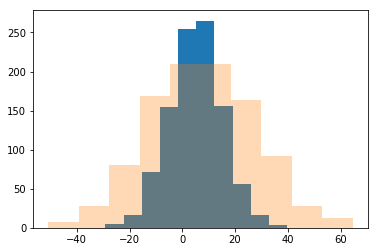

In [37]:
_ = plt.hist(rvs1)
_ = plt.hist(rvs5, alpha=0.3)

In [38]:
rvs1.mean(), rvs5.mean()

(4.986770485224489, 7.457020805490511)

----
## Linear Regression

Using R style symbolic equations, we create a linear dataset, and visualize it (this time using ```matplotlib```).  In this case we are using the package ```statsmodels```, and not ```scipy.stats```.

In [39]:
x = np.linspace(-5, 5, 20)
np.random.seed(1)
y = -5 + 3 * x + 4 * np.random.normal(size=x.shape)
y_no_error = -5 + 3 * x

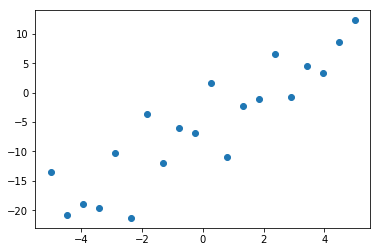

In [40]:
plt.plot(x, y, 'o')

We now create a pandas dataframe from the x,y data, and declare a model that says ```y``` is a linear function of ```x```.  Note that we do not have to declare a constant in our model, for this variant of Ordinary Least Squares fitting.

In [41]:
data = pd.DataFrame({'x': x, 'y': y})

In [42]:
model = ols('y ~ x', data).fit()

In [43]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.804
Model:                            OLS   Adj. R-squared:                  0.794
Method:                 Least Squares   F-statistic:                     74.03
Date:                Sun, 15 Mar 2020   Prob (F-statistic):           8.56e-08
Time:                        15:04:03   Log-Likelihood:                -57.988
No. Observations:                  20   AIC:                             120.0
Df Residuals:                      18   BIC:                             122.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -5.5335      1.036     -5.342      0.000      -7.710      -3.357
x              2.9369      0.341      8.604      0.000       2.220       3.654
==============================================================================
Omnibus:                        0.100   Durbin-Watson:                   2.956
Prob(Omnibus):                  0.951   Jarque-Bera (JB):                0.322
Skew:                          -0.058   Prob(JB):                        0.851
Kurtosis:                       2.390   Cond. No.                         3.03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Just for fun, I plotted the four lines you get when taking the 5% extremes for intercept and slope.

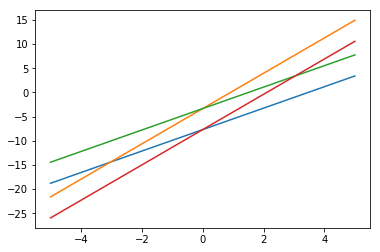

In [44]:
y1 = 2.220 * x - 7.71
y2 = 3.654 * x - 3.357
y3 = 2.220 * x - 3.357
y4 = 3.654 * x - 7.71
plt.plot(x, y1, '-')
plt.plot(x, y2, '-')
plt.plot(x, y3, '-')
plt.plot(x, y4, '-')

```summary2``` is an experimental results summary function.  Nothing looks markedly different.

In [45]:
model.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                 Results: Ordinary least squares
=================================================================
Model:              OLS              Adj. R-squared:     0.794   
Dependent Variable: y                AIC:                119.9767
Date:               2020-03-15 15:04 BIC:                121.9682
No. Observations:   20               Log-Likelihood:     -57.988 
Df Model:           1                F-statistic:        74.03   
Df Residuals:       18               Prob (F-statistic): 8.56e-08
R-squared:          0.804            Scale:              21.463  
------------------------------------------------------------------
               Coef.   Std.Err.     t     P>|t|    [0.025   0.975]
------------------------------------------------------------------
Intercept     -5.5335    1.0359  -5.3416  0.0000  -7.7099  -3.3571
x              2.9369    0.3413   8.6040  0.0000   2.2198   3.6540
-----------------------------------------------------------------
Omnibus:               0.100        Durbin-Watson:          2.956
Prob(Omnibus):         0.951        Jarque-Bera (JB):       0.322
Skew:                  -0.058       Prob(JB):               0.851
Kurtosis:              2.390        Condition No.:          3    
=================================================================

"""

Show a plot of actual versus predicted values.

In [46]:
model.params

Intercept   -5.533459
x            2.936888
dtype: float64

In [47]:
model.predict({'x': [0]})

0   -5.533459
dtype: float64

In [48]:
yhat = model.predict({'x': x})

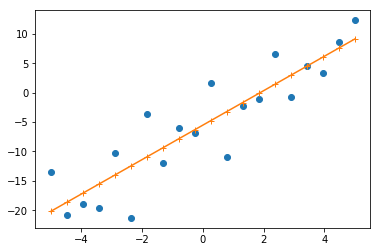

In [49]:
plt.plot(x, y, 'o')
plt.plot(x, yhat, '+-')

### Use explicit OLS
As an alternative to R style model specification, the ```OLS``` class can be called directly, but in this case if we want a non-zero intercept, we have to add a constant 1 to our input data arrays.

In [50]:
x_const_added = sm.add_constant(x, prepend=False)

In [51]:
model2 = sm.OLS(y, x_const_added)

In [52]:
res = model2.fit()

We get exactly the same results, and visualization.

In [53]:
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.804
Model:                            OLS   Adj. R-squared:                  0.794
Method:                 Least Squares   F-statistic:                     74.03
Date:                Sun, 15 Mar 2020   Prob (F-statistic):           8.56e-08
Time:                        15:04:04   Log-Likelihood:                -57.988
No. Observations:                  20   AIC:                             120.0
Df Residuals:                      18   BIC:                             122.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             2.9369      0.341      8.604      0.000       2.220       3.654
const         -5.5335      1.036     -5.342      0.000      -7.710      -3.357
==============================================================================
Omnibus:                        0.100   Durbin-Watson:                   2.956
Prob(Omnibus):                  0.951   Jarque-Bera (JB):                0.322
Skew:                          -0.058   Prob(JB):                        0.851
Kurtosis:                       2.390   Cond. No.                         3.03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [54]:
yhat2 = res.predict()

In [55]:
yhat2

array([-20.21790012, -18.67216943, -17.12643874, -15.58070805,
       -14.03497735, -12.48924666, -10.94351597,  -9.39778528,
        -7.85205458,  -6.30632389,  -4.7605932 ,  -3.21486251,
        -1.66913181,  -0.12340112,   1.42232957,   2.96806026,
         4.51379095,   6.05952165,   7.60525234,   9.15098303])

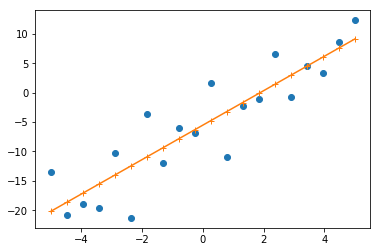

In [56]:
plt.plot(x, y, 'o')
plt.plot(x, yhat2, '+-')

I thought I would lift my game, and prepare a more professional graphic, as the expense of more code.

I create a ```matplotlib``` figure and axes object.  In the axes objecr I plot the raw data, the predicted data, and the underlying linear model.  I create a grid, and moves the X and Y axis to run through (0,0) (and not at the edges of the graph.  I finally plot the 95% confidence limits for predictions made with the equation we have derived from the model.

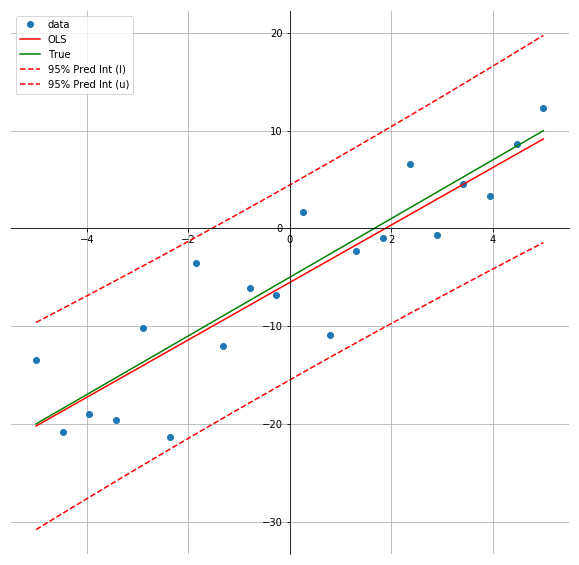

In [57]:
prstd, iv_l, iv_u = wls_prediction_std(res)

fig, ax = plt.subplots(figsize=(10, 10))

ax.plot(x, y, 'o', label='data')
ax.plot(x, yhat2, 'r-', label='OLS')
ax.plot(x, y_no_error, 'g-', label='True')
# ax.axvline(0, c='black')
# ax.axhline(0, c='black')
ax.grid()

ax.spines['bottom'].set_position('zero')
ax.spines['left'].set_position('zero')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

ax.plot(x, iv_l, 'r--', label='95% Pred Int (l)')
ax.plot(x, iv_u, 'r--', label='95% Pred Int (u)')

ax.legend(loc='best')

Here we show some of the attributes of the RegressionResults object.

In [58]:
res.predict([0, 1])

array([-5.53345855])

In [59]:
res.rsquared

0.8044102939875739

In [60]:
res.rsquared_adj

0.7935441992091058

In [61]:
res.conf_int()

array([[ 2.21976259,  3.65401404],
       [-7.70985258, -3.35706451]])

In [62]:
gp = res.get_prediction([[0, 1], [10, 1]])

In [63]:
gp.conf_int()

array([[-7.70985258, -3.35706451],
       [16.34118537, 31.32966385]])

We now create a graphic showing the model confidence limits.  We first create ```x2```, a linear array spanning our data range.  We add a constant 1 to this array, and use this to get the predictions of the output for this input array.  The PredictionResults object returned by the  call to ```get_prediction``` can be used (by calling the method ```conf_int```) to the model confidence intervals.

In [64]:
x2 = np.linspace(-10, 10, 21)

In [65]:
x2

array([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,
         1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.])

In [66]:
x2_enh = sm.add_constant(x2, prepend=False)

In [67]:
x2_enh[0:5]

array([[-10.,   1.],
       [ -9.,   1.],
       [ -8.,   1.],
       [ -7.,   1.],
       [ -6.,   1.]])

In [68]:
gp = res.get_prediction(x2_enh)

In [69]:
ci = gp.conf_int(alpha=0.01)

In [70]:
ci[0:5]

array([[-45.17008183, -24.63460157],
       [-41.29737811, -22.63352866],
       [-37.43533928, -20.62179086],
       [-33.58791501, -18.5954385 ],
       [-29.76115093, -16.54842594]])

In [71]:
upper = [z[1] for z in ci]
lower = [z[0] for z in ci]

In [72]:
prstd, iv_l, iv_u = wls_prediction_std(res)

In the graph below, note that we are more certain about the line we draw (especially about the centre), than we are about any prediction based on that line.  Even if the line was exact (and the more data points we have, the better it is), the unavoidable error term in our model will still smear the observed values around the linear equation. 

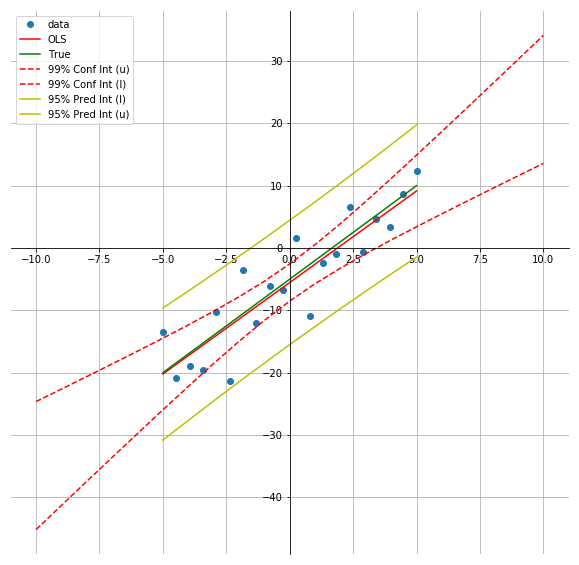

In [73]:
fig, ax = plt.subplots(figsize=(10, 10))

ax.plot(x, y, 'o', label='data')
ax.plot(x, yhat2, 'r-', label='OLS')
ax.plot(x, y_no_error, 'g-', label='True')

ax.plot(x2, upper, 'r--', label='99% Conf Int (u)')
ax.plot(x2, lower, 'r--', label='99% Conf Int (l)')
ax.plot(x, iv_l, 'y-', label='95% Pred Int (l)')
ax.plot(x, iv_u, 'y-', label='95% Pred Int (u)')

ax.grid()

ax.spines['bottom'].set_position('zero')
ax.spines['left'].set_position('zero')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)


ax.legend(loc='best')

In [74]:
type(gp)

statsmodels.regression._prediction.PredictionResults

## Nonlinear Regression

We now move to an example on non-linear regression, where we concoct some data using a combination of linear, quadratic and sine functions.

In [75]:
nsample = 100
sig = 0.5
x = np.linspace(0, 20, nsample)
x2 = np.sin(x)
x3 = (x - 5) ** 2
x4 = np.ones(nsample)

Display the components that make up our data

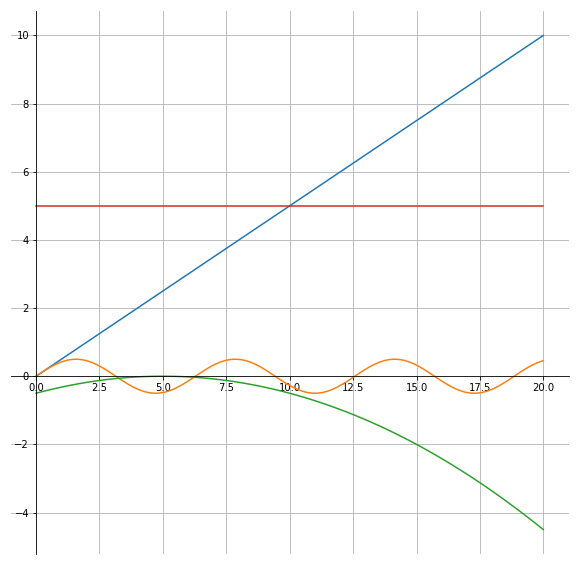

In [76]:
fig, ax = plt.subplots(figsize=(10, 10))

ax.plot(x, x * 0.5)
ax.plot(x, x2 * 0.5)
ax.plot(x, x3 * (-0.02))
ax.plot(x, x4 * 5.0)

ax.grid()

ax.spines['bottom'].set_position('zero')
ax.spines['left'].set_position('zero')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

Create the combination of functions, and add Gaussian noise.

In [77]:
x5 = np.column_stack((x, x2, x3, x4))
beta = [0.5, 0.5, -0.02, 5.0]
y_true = np.dot(x5, beta)
y = y_true + sig * np.random.normal(size=nsample)

Quick and dirty plot.

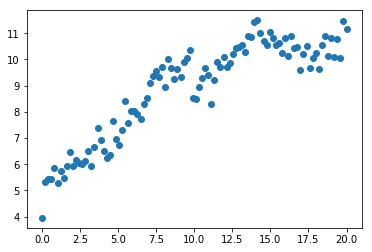

In [78]:
plt.plot(x, y, 'o')

Now fit the functions to the observed results, using Ordinary Least Squares.

In [79]:
res = sm.OLS(y, x5).fit()

In [80]:
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.953
Model:                            OLS   Adj. R-squared:                  0.951
Method:                 Least Squares   F-statistic:                     646.4
Date:                Sun, 15 Mar 2020   Prob (F-statistic):           1.67e-63
Time:                        15:04:06   Log-Likelihood:                -52.024
No. Observations:                 100   AIC:                             112.0
Df Residuals:                      96   BIC:                             122.5
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.5189      0.016     33.013      0.000       0.488       0.550
x2             0.5298      0.061      8.723      0.000       0.409       0.650
x3            -0.0221      0.001    -15.983      0.000      -0.025      -0.019
const          4.9675      0.102     48.746      0.000       4.765       5.170
==============================================================================
Omnibus:                        0.130   Durbin-Watson:                   1.857
Prob(Omnibus):                  0.937   Jarque-Bera (JB):                0.241
Skew:                           0.079   Prob(JB):                        0.886
Kurtosis:                       2.818   Cond. No.                         223.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Show the results:  the fit is very good!

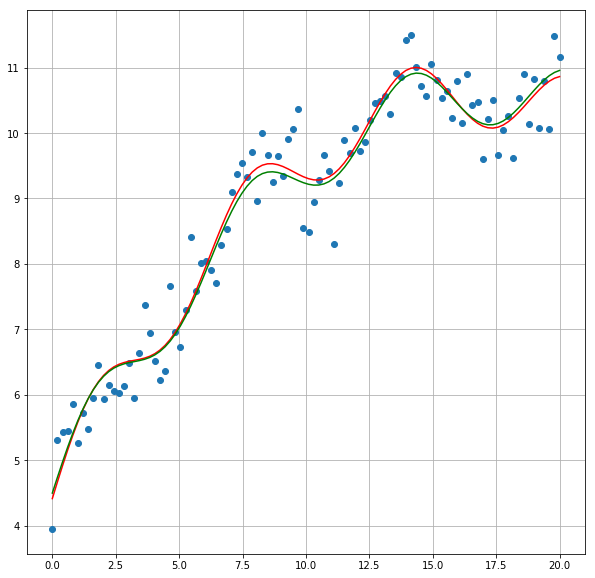

In [81]:
fig, ax = plt.subplots(figsize=(10, 10))

yhat = res.predict()
ax.plot(x, y, 'o')
ax.plot(x, yhat, 'r-')
ax.plot(x, y_true, 'g-')
ax.grid()

As before, create a graphic showing the model and prediction confidence intervals.

In [82]:
gp2 = res.get_prediction(x5)

ci2 = gp2.conf_int(alpha=0.01)
upper = [z[1] for z in ci2]
lower = [z[0] for z in ci2]

In [83]:
prstd, iv_l, iv_u = wls_prediction_std(res)

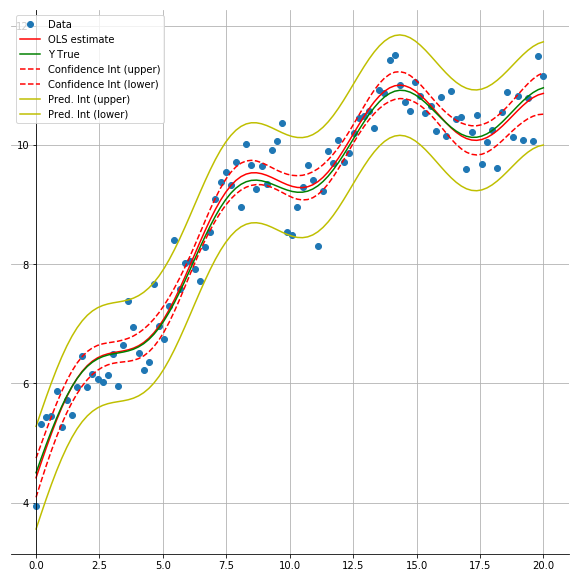

In [84]:
fig, ax = plt.subplots(figsize=(10, 10))

yhat = res.predict()
ax.plot(x, y, 'o', label='Data')
ax.plot(x, yhat, 'r-', label='OLS estimate')
ax.plot(x, y_true, 'g-', label='Y True')
ax.plot(x, upper, 'r--', label='Confidence Int (upper)')
ax.plot(x, lower, 'r--', label='Confidence Int (lower)')
ax.plot(x, iv_u, 'y-', label='Pred. Int (upper)')
ax.plot(x, iv_l, 'y-', label='Pred. Int (lower)')

ax.legend(loc='best')

ax.grid()

# ax.spines['bottom'].set_position('zero')
ax.spines['left'].set_position('zero')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

---
## Multivariate Regression

### Iris Data Set

We look at the famous Iris flower dataset, and investigate the idea that there is a linear relationship between  sepal width and petal length across all three species.

In [85]:
iris = pd.read_csv(DATA_PREFIX + 'iris.csv')
iris.head(4)

,sepal_length,sepal_width,petal_length,petal_width,name
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa


Fit the OLS model, and show the results summary.  We see that model parameters we see are unlikely to have been observed by chance in a world with no true relationship.

In [86]:
model = ols('sepal_width ~ name + petal_length', iris).fit()

In [87]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:            sepal_width   R-squared:                       0.478
Model:                            OLS   Adj. R-squared:                  0.468
Method:                 Least Squares   F-statistic:                     44.63
Date:                Sun, 15 Mar 2020   Prob (F-statistic):           1.58e-20
Time:                        15:04:06   Log-Likelihood:                -38.185
No. Observations:                 150   AIC:                             84.37
Df Residuals:                     146   BIC:                             96.41
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept              2.9813      0

Create a color code in (R,G,B) format for each species  (I am cheating as I know that there are only three species)

In [88]:
categories = pd.Categorical(iris['name'])

lut = {0: (1, 0, 0), 1: (0, 1, 0), 2: (0, 0, 1)}

species_color = [lut[code] for code in categories.codes]

Create a graphic, with each species data point is color coded.  We see the best OLS model for a line that explains sepal width for each species, with a common slope, and different intercept.  Versicola and Virginica look OK, but the Setosa data seems to have no such linear relation.  The R2 is quiet low, showing that is a lot of variation in sepal width not explained by our model (or the data is very noisy).

Text(0, 0.5, 'Sepal Width')

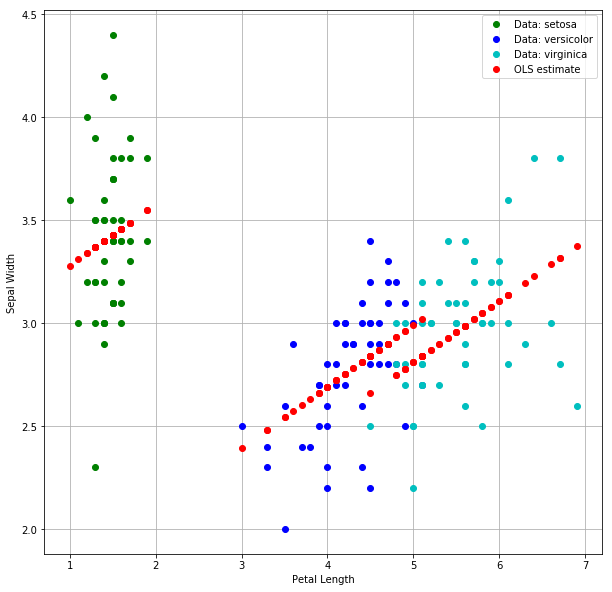

In [89]:
fig, ax = plt.subplots(figsize=(10, 10))

yhat = model.predict()
categories = pd.Categorical(iris['name'])
for name, color in zip(
    ['setosa', 'versicolor', 'virginica'], ['g', 'b', 'c']
):
    ax.plot(
        iris[iris['name'] == name]['petal_length'],
        iris[iris['name'] == name]['sepal_width'],
        'o',
        label='Data: ' + name,
        c=color,
    )
# end for
ax.plot(
    iris['petal_length'], yhat, 'ro', label='OLS estimate'
)
ax.legend(loc='best')
ax.grid()
ax.set_xlabel('Petal Length')
ax.set_ylabel('Sepal Width')

We can explore this by using the ```pandas``` plotting facilities to get a quick and dirty graphic showing the relationship between numeric variables.

D:\Anaconda3\envs\ac5-py37\lib\site-packages\ipykernel_launcher.py:10: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  # Remove the CWD from sys.path while we load stuff.


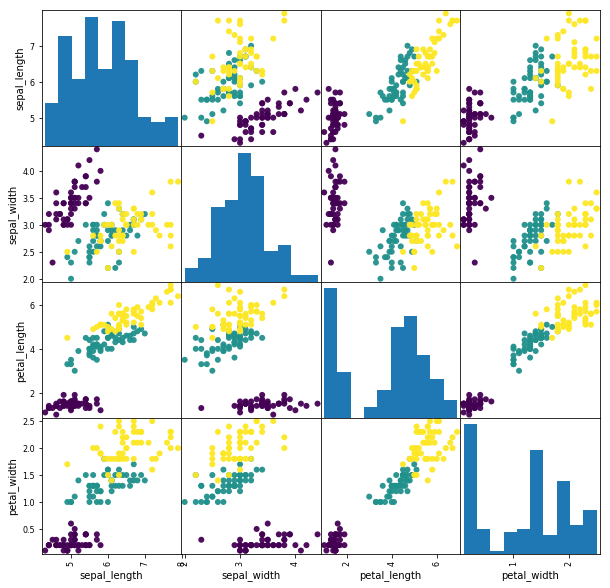

In [90]:
fig, ax = plt.subplots(figsize=(10, 10))

categories = pd.Categorical(iris['name'])
__ = pd.plotting.scatter_matrix(
    iris,
    c=categories.codes,
    ax=ax,
    marker='o',
    # cmap='jet',
    alpha=0.95,
)

We can use the F test to check that our parameters of the model are unlikely to have happened by chance.

In [91]:
model.f_test([0, 1, -1, 0])

<class 'statsmodels.stats.contrast.ContrastResults'>
<F test: F=array([[3.24533535]]), p=0.07369058781700738, df_denom=146, df_num=1>

In [92]:
dict(zip(categories.codes, iris['name']))

{0: 'setosa', 1: 'versicolor', 2: 'virginica'}

In [93]:
A = np.identity(len(model.params))
A = A[1:, :]

# This tests that each coefficient is jointly statistically
# significantly different from zero.

print(model.f_test(A))

<F test: F=array([[44.62737137]]), p=1.5774279638421893e-20, df_denom=146, df_num=3>


In [94]:
A

array([[0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 0., 1.]])

In [95]:
model.fvalue, model.f_pvalue

(44.627371372682035, 1.577427963841873e-20)

In [96]:
categories.describe()

,counts,freqs
categories,,
setosa,50,0.333333
versicolor,50,0.333333
virginica,50,0.333333


We can use Seaborn to get a better graphic (with a legend this time! What were you thinking ```pandas```, in not having a legend)

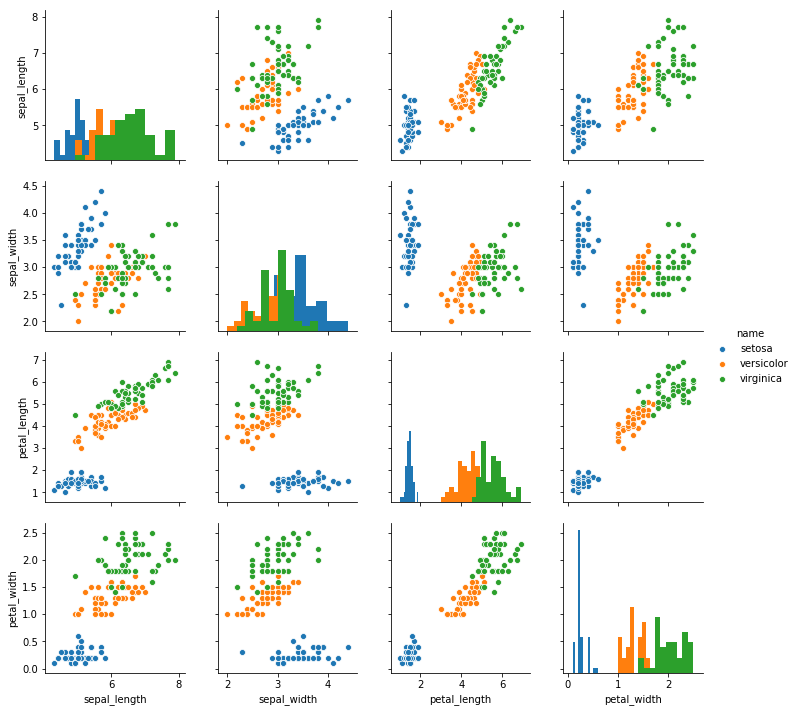

In [97]:
_ = sn.pairplot(
    iris,
    vars=[
        'sepal_length',
        'sepal_width',
        'petal_length',
        'petal_width',
    ],
    kind='scatter',
    hue='name',
    diag_kind='hist',
)

When we repeat our analysis on just the Setosa data points, we get a linear affect that would be seen roughly 1 in every 5 experiments, just by random chance, assuming no true linear effect.  We would be justified in confirming the Null Hypothesis that in the Setosa species sepal width is independent of petal length.

In [98]:
setosa = iris[iris['name'] == 'setosa']

In [99]:
model = ols('sepal_width ~ petal_length', setosa).fit()

In [100]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            sepal_width   R-squared:                       0.031
Model:                            OLS   Adj. R-squared:                  0.011
Method:                 Least Squares   F-statistic:                     1.547
Date:                Sun, 15 Mar 2020   Prob (F-statistic):              0.220
Time:                        15:04:11   Log-Likelihood:                -21.404
No. Observations:                  50   AIC:                             46.81
Df Residuals:                      48   BIC:                             50.63
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        2.8499      0.460      6.197      0.000       1.925       3.775
petal_length     0.3880      0.312      1.244      0.220      -0.239       1.015
==============================================================================
Omnibus:                        2.143   Durbin-Watson:                   1.500
Prob(Omnibus):                  0.343   Jarque-Bera (JB):                1.249
Skew:                           0.242   Prob(JB):                        0.536
Kurtosis:                       3.604   Cond. No.                         18.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

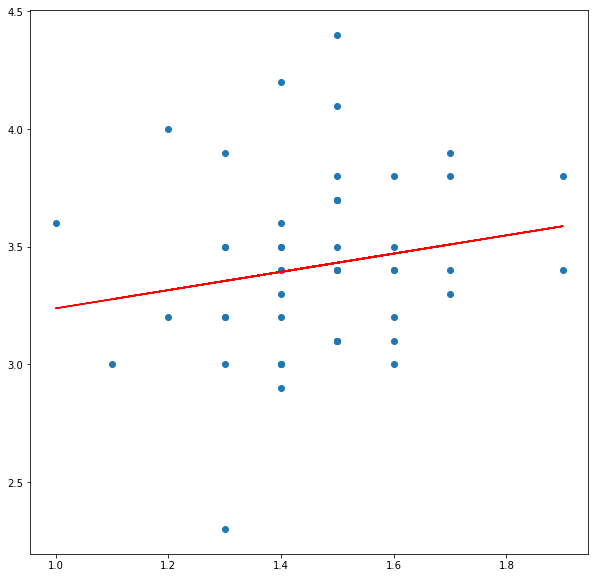

In [101]:
fig, ax = plt.subplots(figsize=(10, 10))

ax.plot(setosa['petal_length'], setosa['sepal_width'], 'o')
yhat = model.predict(setosa['petal_length'])
ax.plot(setosa['petal_length'], yhat, 'r-')

### IQ Data Set

Here, we go back to our IQ dataset, and look to see what variables are correlated with VIQ.  Unsurprisingly, we are warned that there is a degree of correlation between our independent variable: this means that the inverse of the (X @ X.T) matrix (where X is our matrix of independent variable observations might have significant errors, due to round-off.  Most correlations would be rejected at the 5% level.

In [102]:
clean_data.head(4)

,Unnamed: 0,Gender,FSIQ,VIQ,PIQ,Weight,Height,MRI_Count
0,1,Female,133,132,124,118.0,64.5,816932
2,3,Male,139,123,150,143.0,73.3,1038437
3,4,Male,133,129,128,172.0,68.8,965353
4,5,Female,137,132,134,147.0,65.0,951545


In [103]:
model = ols(
    'VIQ ~ Height + Weight + MRI_Count + C(Gender) -1',
    clean_data,
).fit()

In [104]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                    VIQ   R-squared:                       0.249
Model:                            OLS   Adj. R-squared:                  0.158
Method:                 Least Squares   F-statistic:                     2.733
Date:                Sun, 15 Mar 2020   Prob (F-statistic):             0.0455
Time:                        15:04:11   Log-Likelihood:                -167.03
No. Observations:                  38   AIC:                             344.1
Df Residuals:                      33   BIC:                             352.2
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
C(Gender)[Female]   169.7719     90.05

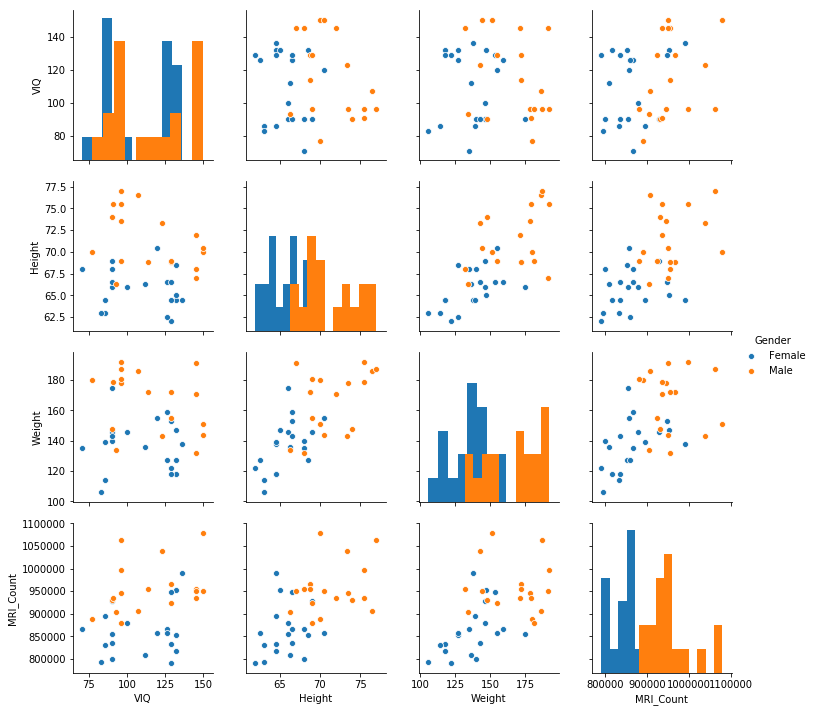

In [105]:
_ = sn.pairplot(
    clean_data,
    vars=['VIQ', 'Height', 'Weight', 'MRI_Count'],
    kind='scatter',
    hue='Gender',
    diag_kind='hist',
)

Usung the F test, we reject the hypothesis that there are true gender difference for VIQ

In [106]:
model.f_test([1, -1, 0, 0, 0])

<class 'statsmodels.stats.contrast.ContrastResults'>
<F test: F=array([[0.86984607]]), p=0.35777194549809077, df_denom=33, df_num=1>

In [107]:
model.f_test([-1, +1, 0, 0, 0])

<class 'statsmodels.stats.contrast.ContrastResults'>
<F test: F=array([[0.86984607]]), p=0.35777194549809077, df_denom=33, df_num=1>

Just for fun, it appears that ```Weight``` is strongly correlated with ```Height```, and less strongly with Gender.

In [108]:
model = ols(
    'Weight ~ Height + C(Gender) + 1 ', clean_data
).fit()

In [109]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Weight   R-squared:                       0.525
Model:                            OLS   Adj. R-squared:                  0.498
Method:                 Least Squares   F-statistic:                     19.37
Date:                Sun, 15 Mar 2020   Prob (F-statistic):           2.17e-06
Time:                        15:04:14   Log-Likelihood:                -159.19
No. Observations:                  38   AIC:                             324.4
Df Residuals:                      35   BIC:                             329.3
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept           -59.3879     64.085     -0.927      0.360    -189.487      70.711
C(Gender)[T.Male]    12.4831      7.678      1.626      0.113      -3.104      28.070
Height                2.9892      0.973      3.073      0.004       1.014       4.964
==============================================================================
Omnibus:                        0.513   Durbin-Watson:                   2.028
Prob(Omnibus):                  0.774   Jarque-Bera (JB):                0.450
Skew:                           0.246   Prob(JB):                        0.798
Kurtosis:                       2.796   Cond. No.                     1.63e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.63e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [110]:
model = ols('Weight ~ Height  + 1 ', clean_data).fit()

In [111]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Weight   R-squared:                       0.489
Model:                            OLS   Adj. R-squared:                  0.475
Method:                 Least Squares   F-statistic:                     34.51
Date:                Sun, 15 Mar 2020   Prob (F-statistic):           1.02e-06
Time:                        15:04:14   Log-Likelihood:                -160.57
No. Observations:                  38   AIC:                             325.1
Df Residuals:                      36   BIC:                             328.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -130.3535     47.980     -2.717      0.010    -227.661     -33.046
Height         4.1129      0.700      5.875      0.000       2.693       5.533
==============================================================================
Omnibus:                        2.899   Durbin-Watson:                   2.011
Prob(Omnibus):                  0.235   Jarque-Bera (JB):                2.041
Skew:                           0.561   Prob(JB):                        0.360
Kurtosis:                       3.176   Cond. No.                     1.19e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.19e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Test for IQ Gender Differences

If we look at a model where we try to explain all the variation in ```VIQ```, we get a result (F Test) that suggests that what we see would happen about 50% of the time, assuming no gender differences.

In [112]:
model = ols('VIQ ~ C(Gender) - 1 ', clean_data).fit()

In [113]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    VIQ   R-squared:                       0.016
Model:                            OLS   Adj. R-squared:                 -0.012
Method:                 Least Squares   F-statistic:                    0.5703
Date:                Sun, 15 Mar 2020   Prob (F-statistic):              0.455
Time:                        15:04:14   Log-Likelihood:                -172.16
No. Observations:                  38   AIC:                             348.3
Df Residuals:                      36   BIC:                             351.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
C(Gender)[Female]   109.4500      5.160     21.213      0.000      98.986     119.914
C(Gender)[Male]     115.1111      5.439     21.166      0.000     104.081     126.141
==============================================================================
Omnibus:                       21.889   Durbin-Watson:                   1.891
Prob(Omnibus):                  0.000   Jarque-Bera (JB):                3.421
Skew:                           0.002   Prob(JB):                        0.181
Kurtosis:                       1.530   Cond. No.                         1.05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [114]:
model.f_test([1, -1])

<class 'statsmodels.stats.contrast.ContrastResults'>
<F test: F=array([[0.57026509]]), p=0.45506603948583946, df_denom=36, df_num=1>

------------
## Economic Data

As an example of regression of multiple variables, we load some economic data.

In [115]:
header = [
    'EDUCATION',
    'SOUTH',
    'SEX',
    'EXPERIENCE',
    'UNION',
    'WAGE',
    'AGE',
    'RACE',
    'OCCUPATION',
    'SECTOR',
    'MARR',
]

In [116]:
DATA_PREFIX = '../data/'
longly = pd.read_csv(
    DATA_PREFIX + 'CPS_85_Wages.txt',
    sep='\t',
    skiprows=26,
    skipfooter=6,
    header=None,
    names=header,
)

D:\Anaconda3\envs\ac5-py37\lib\site-packages\ipykernel_launcher.py:8: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  


In [117]:
longly.head()

,EDUCATION,SOUTH,SEX,EXPERIENCE,UNION,WAGE,AGE,RACE,OCCUPATION,SECTOR,MARR
0,8,0,1,21,0,5.10,35,2,6,1,1
1,9,0,1,42,0,4.95,57,3,6,1,1
2,12,0,0,1,0,6.67,19,3,6,1,0
3,12,0,0,4,0,4.00,22,3,6,0,0
4,12,0,0,17,0,7.50,35,3,6,0,1


In [118]:
longly.tail()

,EDUCATION,SOUTH,SEX,EXPERIENCE,UNION,WAGE,AGE,RACE,OCCUPATION,SECTOR,MARR
529,18,0,0,5,0,11.36,29,3,5,0,0
530,12,0,1,33,0,6.10,51,1,5,0,1
531,17,0,1,25,1,23.25,48,1,5,0,1
532,12,1,0,13,1,19.88,31,3,5,0,1
533,16,0,0,33,0,15.38,55,3,5,1,1


### Visualizing Regression Linear Models by Seaborn

Seaborn customization includes:

- setting the diagonal histograms to have alpha=0.5, so that the overlapping histograms are not obscured

- setting the off diagonal regression marker size to a smaller-than-default value, for clarity

D:\Anaconda3\envs\ac5-py37\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


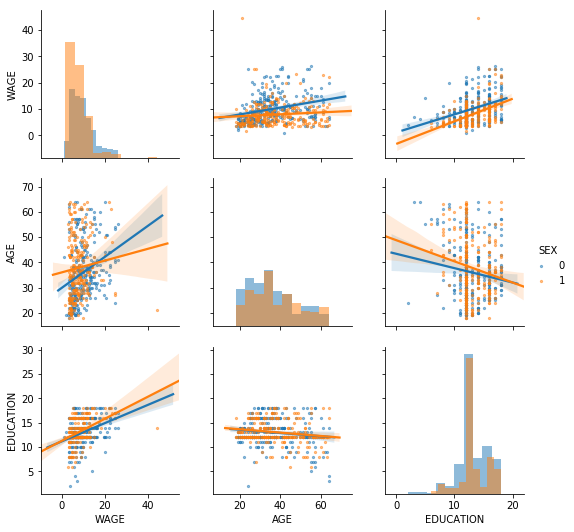

In [119]:
sn.pairplot(
    longly,
    vars=['WAGE', 'AGE', 'EDUCATION'],
    kind='reg',
    hue='SEX',
    diag_kind='hist',
    plot_kws={'scatter_kws': {'alpha': 0.5, 's': 5}},
    diag_kws={'alpha': 0.5},
)

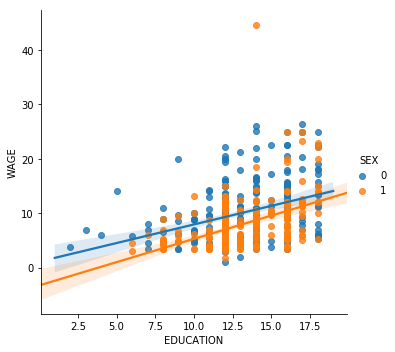

In [120]:
sn.lmplot(y='WAGE', x='EDUCATION', data=longly, hue='SEX')

### Comparing Ordinary Linear Regression, and Robust Linear Regression

In [121]:
wage = longly['WAGE']
education = longly['EDUCATION']
education = sm.add_constant(education)
res1 = sm.RLM(wage, education).fit()
print(res1.summary())

                    Robust linear Model Regression Results                    
Dep. Variable:                   WAGE   No. Observations:                  534
Model:                            RLM   Df Residuals:                      532
Method:                          IRLS   Df Model:                            1
Norm:                          HuberT                                         
Scale Est.:                       mad                                         
Cov Type:                          H1                                         
Date:                Sun, 15 Mar 2020                                         
Time:                        15:04:17                                         
No. Iterations:                    18                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2165      0.890      0.243      0.8

In [122]:
res2 = sm.OLS(wage, education).fit()
print(res2.summary())

                            OLS Regression Results                            
Dep. Variable:                   WAGE   R-squared:                       0.146
Model:                            OLS   Adj. R-squared:                  0.144
Method:                 Least Squares   F-statistic:                     90.85
Date:                Sun, 15 Mar 2020   Prob (F-statistic):           5.47e-20
Time:                        15:04:17   Log-Likelihood:                -1589.2
No. Observations:                 534   AIC:                             3182.
Df Residuals:                     532   BIC:                             3191.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.7460      1.045     -0.714      0.4

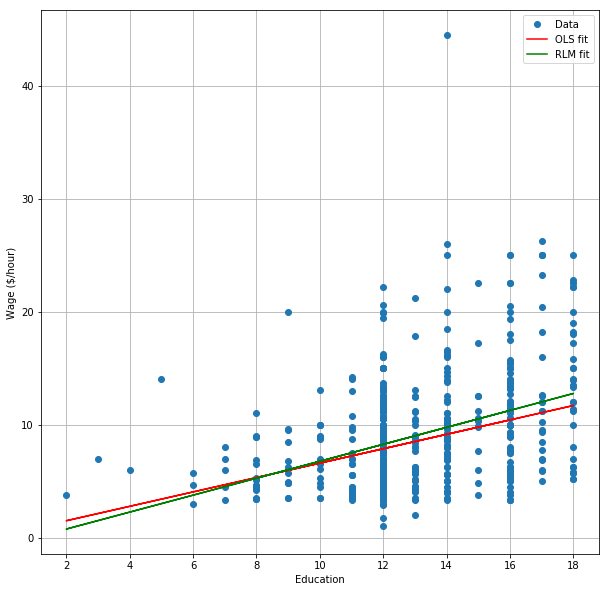

In [123]:
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111)
x = education['EDUCATION']
ax.plot(x, wage, 'o', label='Data')
ax.plot(x, res1.fittedvalues, 'r-', label='OLS fit')
ax.plot(x, res2.fittedvalues, 'g-', label='RLM fit')

ax.grid()
ax.set_xlabel('Education')
ax.set_ylabel('Wage ($/hour)')


# ax.spines['bottom'].set_position('zero')
# ax.spines['left'].set_position('zero')
# ax.spines['top'].set_visible(False)
# ax.spines['right'].set_visible(False)


ax.legend(loc='best')

In [124]:
education.head()

,const,EDUCATION
0,1.0,8
1,1.0,9
2,1.0,12
3,1.0,12
4,1.0,12


Testing for a interaction between between ```EDUCATION``` and ```SEX```, I think the conclusion is that ```WAGE``` strongly depends upon ```EDUCATION```, less strongly on ```SEX``` (Females earn less); there is a Education * Sex interaction, but it is not strongly significant.

In [125]:
res = ols(
    formula='WAGE ~ EDUCATION + SEX + EDUCATION * SEX',
    data=longly,
).fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                   WAGE   R-squared:                       0.190
Model:                            OLS   Adj. R-squared:                  0.186
Method:                 Least Squares   F-statistic:                     41.50
Date:                Sun, 15 Mar 2020   Prob (F-statistic):           4.24e-24
Time:                        15:04:18   Log-Likelihood:                -1575.0
No. Observations:                 534   AIC:                             3158.
Df Residuals:                     530   BIC:                             3175.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         1.1046      1.314      0.841

---
## Reproducibility

In [126]:
%watermark -h -iv

seaborn     0.9.0
matplotlib  3.0.2
statsmodels 0.9.0
numpy       1.15.4
pandas      1.0.0
scipy       1.1.0
host name: DESKTOP-SODFUN6


In [127]:
%watermark

2020-03-15T15:04:18+10:00

CPython 3.7.1
IPython 7.2.0

compiler   : MSC v.1915 64 bit (AMD64)
system     : Windows
release    : 10
machine    : AMD64
processor  : Intel64 Family 6 Model 94 Stepping 3, GenuineIntel
CPU cores  : 8
interpreter: 64bit
